In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f,pearsonr,spearmanr

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10

In [2]:
variant_info_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/merged.SNVs.NIMH+ADSP_v2.txt"

In [3]:
gosselin_microglia_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/gosselin_microglia_effect_scores.txt"

encode_monocyte_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/encode_monocyte_effect_scores.txt"

fullard_put_neuron_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/fullard_put_neun_effect_scores.txt"

In [4]:
variant_info = pd.read_csv(variant_info_file,
                           sep='\t'
                          )

In [5]:
def readScoresFileAndConcat(scores_files_list,
                            variant_info,
                            names_list):

    colsuffixes = ["effect_score",
                   "ref_score",
                   "alt_score"
                  ]
    
    tables_to_concat = [variant_info]
    
    for i,scores_file in enumerate(scores_files_list):
        colnames = [names_list[i]+"_"+suffix for suffix in colsuffixes]
        scores = pd.read_csv(scores_file,
                             sep='\t',
                             names=colnames
                            )
        tables_to_concat.append(scores)
    
    variant_info = pd.concat(tables_to_concat,
                             axis=1
                            )
    return variant_info

In [6]:
scores_files_list = [gosselin_microglia_scores_file,
                     encode_monocyte_scores_file,
                     fullard_put_neuron_scores_file]
names_list = ["Microglia",
              "Monocyte",
              "Neuron"
             ]

variant_info = readScoresFileAndConcat(scores_files_list,
                                       variant_info,
                                       names_list
                                      )

In [7]:
variant_info["Microglia_effect_score_normed"] = variant_info["Microglia_effect_score"]/np.std(variant_info["Microglia_effect_score"])
variant_info["Monocyte_effect_score_normed"] = variant_info["Monocyte_effect_score"]/np.std(variant_info["Monocyte_effect_score"])
variant_info["Neuron_effect_score_normed"] = variant_info["Neuron_effect_score"]/np.std(variant_info["Neuron_effect_score"])

In [8]:
variant_info.head()

CHROM    POS              ID         rsid REF ALT   AF.nimh  AN.nimh  \
0      1  10177  chr1:10177:A:C  rs201752861   A   C  0.013000   1262.0   
1      1  10250  chr1:10250:A:C  rs199706086   A   C  0.028000   2786.0   
2      1  10257  chr1:10257:A:C  rs111200574   A   C  0.003047   2786.0   
3      1  10291  chr1:10291:C:T  rs145427775   C   T  0.008802   2786.0   
4      1  10327  chr1:10327:T:C  rs112750067   T   C  0.208000   2786.0   

   AF.adsp_fams  AN.adsp_fams  ...  Microglia_alt_score  \
0           NaN           NaN  ...                  NaN   
1           NaN           NaN  ...                  NaN   
2           NaN           NaN  ...                  NaN   
3           NaN           NaN  ...                  NaN   
4           NaN           NaN  ...                  NaN   

   Monocyte_effect_score  Monocyte_ref_score  Monocyte_alt_score  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   

   Neuron_effect_score  Neuron_ref_score  Neuron_alt_score  \
0                  NaN               NaN               NaN   
1                  NaN               NaN               NaN   
2                  NaN               NaN               NaN   
3                  NaN               NaN               NaN   
4                  NaN               NaN               NaN   

   Microglia_effect_score_normed  Monocyte_effect_score_normed  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

   Neuron_effect_score_normed  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 24 columns]

In [15]:
plt.figure(figsize=(5,5))
plt.hist(variant_info["Microglia_effect_score_normed"],
         density=True,
         bins=1000,
         color='#6b97ff',
         histtype='step',
         label='Microglia',
         linewidth=2
        )
plt.hist(variant_info["Monocyte_effect_score_normed"],
         density=True,
         bins=1000,
         color='#ff6b97',
         histtype='step',
         label='CD14+ Monocyte',
         linewidth=2
        )
plt.hist(variant_info["Neuron_effect_score_normed"],
         density=True,
         bins=1000,
         color='#97ff6b',
         histtype='step',
         label='Neuron',
         linewidth=2
        )
plt.xlim([-5,5])
plt.xlabel("Z-score normalized effect (ref/alt)")
plt.legend()
plt.savefig("bulk_model_score_distributions.svg")

In [10]:
def scatterPlotCellTypePairs(effect_scores_pair_dropna, ct1_name, ct2_name):
    plt.figure(figsize=(8,8))
    
    heatmap, xedges, yedges = np.histogram2d(effect_scores_pair_dropna[ct1_name+"_"+"effect_score_normed"],
                                             effect_scores_pair_dropna[ct2_name+"_"+"effect_score_normed"],
                                             bins=10000
                                            )
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    plt.imshow(heatmap.T,
               extent=extent,
               origin='lower',
               cmap='Reds'
              )
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel(ct1_name)
    plt.ylabel(ct2_name)
    plt.show()

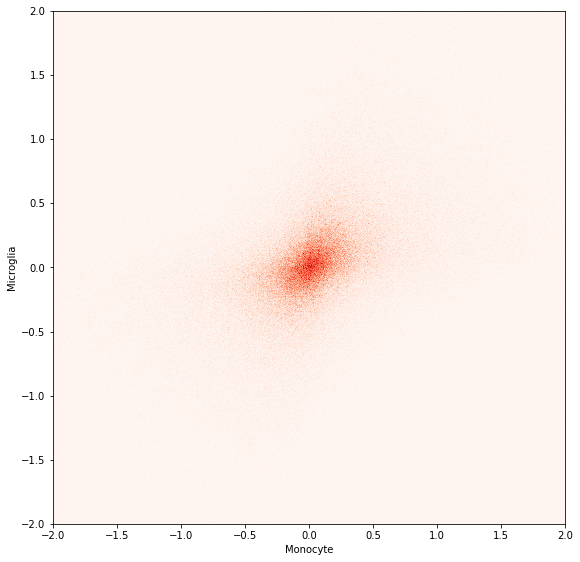

In [11]:
ct1_name = "Monocyte"
ct2_name = "Microglia"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

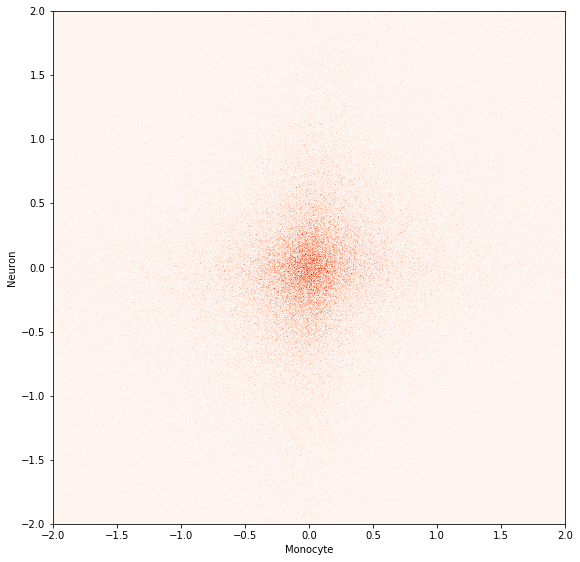

In [12]:
ct1_name = "Monocyte"
ct2_name = "Neuron"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

In [13]:
ct1_name = "Microglia"
ct2_name = "Neuron"

scatterPlotCellTypePairs(variant_info[[ct1_name+"_"+"effect_score_normed",
                                       ct2_name+"_"+"effect_score_normed"
                                      ]].dropna(),
                         ct1_name,
                         ct2_name
                        )

In [14]:
variant_info.columns

Index(['CHROM', 'POS', 'ID', 'rsid', 'REF', 'ALT', 'AF.nimh', 'AN.nimh',
       'AF.adsp_fams', 'AN.adsp_fams', 'AF.adsp_cc', 'AN.adsp_cc',
       'Microglia_effect_score', 'Microglia_ref_score', 'Microglia_alt_score',
       'Monocyte_effect_score', 'Monocyte_ref_score', 'Monocyte_alt_score',
       'Neuron_effect_score', 'Neuron_ref_score', 'Neuron_alt_score',
       'Microglia_effect_score_normed', 'Monocyte_effect_score_normed',
       'Neuron_effect_score_normed'],
      dtype='object')

In [15]:
def plotRareAndCommonVariantScoreHistogramsAndConductFTest(rare_variant_info,
                                                          common_variant_info,
                                                          ct_name,
                                                          cohort_name):
    plt.figure(figsize=(9,5))
    plt.hist(rare_variant_info[ct_name+"_"+"effect_score_normed"],
             density=True,
             bins=1000,
             color='red',
             histtype='step',
             label='Rare ' + cohort_name
            )
    plt.hist(common_variant_info[ct_name+"_"+"effect_score_normed"],
             density=True,
             bins=1000,
             color='blue',
             histtype='step',
             label='Common ' + cohort_name
            )

    plt.xlim([-5,5])
    plt.xlabel("Z-score normalized effect"+" "+ct_name+" "+"(ref/alt)")
    plt.legend()
    plt.show()

    rare_variant_variance = np.var(rare_variant_info[ct_name+"_"+"effect_score_normed"],
                                                              ddof=1)
    common_variant_variance = np.var(common_variant_info[ct_name+"_"+"effect_score_normed"],
                                                              ddof=1)
    df1 = rare_variant_info.shape[0]-1
    df2 = common_variant_info.shape[0]-1
    F = rare_variant_variance/common_variant_variance
    print(F)
    print(f.sf(F,df1,df2))

In [16]:
rare_variant_freq_cutoff = 0.01
common_variant_freq_cutoff = 0.05

In [42]:
nimh_rare_variant_info = variant_info.loc[(variant_info["AF.nimh"]<=rare_variant_freq_cutoff) | 
                                          (variant_info["AF.nimh"]>=1-rare_variant_freq_cutoff)
                                         ]
nimh_common_variant_info = variant_info.loc[(variant_info["AF.nimh"]>=common_variant_freq_cutoff) & 
                                            (variant_info["AF.nimh"]<=1-common_variant_freq_cutoff)
                                           ]

In [43]:
adsp_rare_variant_info = variant_info.loc[(variant_info["AF.adsp_fams"]<=rare_variant_freq_cutoff) | 
                                          (variant_info["AF.adsp_fams"]>=1-rare_variant_freq_cutoff)
                                         ]
adsp_common_variant_info = variant_info.loc[(variant_info["AF.adsp_fams"]>=common_variant_freq_cutoff) & 
                                            (variant_info["AF.adsp_fams"]<=1-common_variant_freq_cutoff)
                                           ]

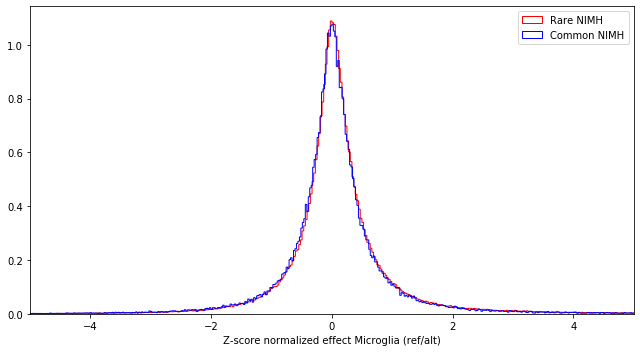

1.0130678040015926
1.8982737890221513e-116


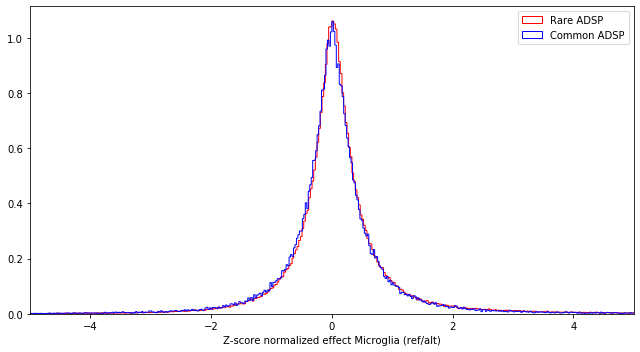

1.0054270869334045
1.2861667374375214e-16


In [19]:
plotRareAndCommonVariantScoreHistogramsAndConductFTest(nimh_rare_variant_info,
                                                       nimh_common_variant_info,
                                                       "Microglia",
                                                       "NIMH")
plotRareAndCommonVariantScoreHistogramsAndConductFTest(adsp_rare_variant_info,
                                                       adsp_common_variant_info,
                                                       "Microglia",
                                                       "ADSP")

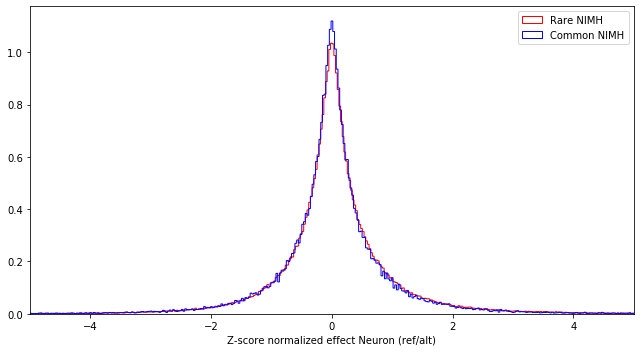

1.0846258584553814
0.0


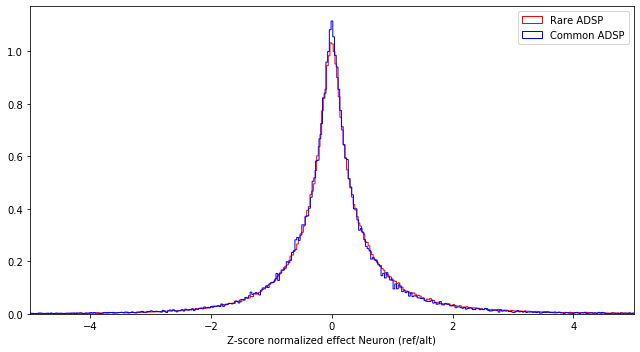

1.073143413059077
0.0


In [20]:
plotRareAndCommonVariantScoreHistogramsAndConductFTest(nimh_rare_variant_info,
                                                       nimh_common_variant_info,
                                                       "Neuron",
                                                       "NIMH")
plotRareAndCommonVariantScoreHistogramsAndConductFTest(adsp_rare_variant_info,
                                                       adsp_common_variant_info,
                                                       "Neuron",
                                                       "ADSP")

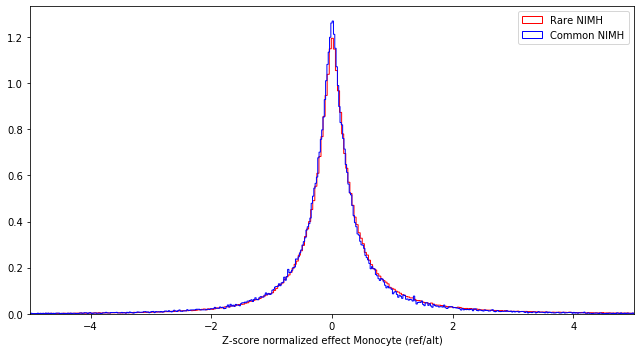

1.128791818654043
0.0


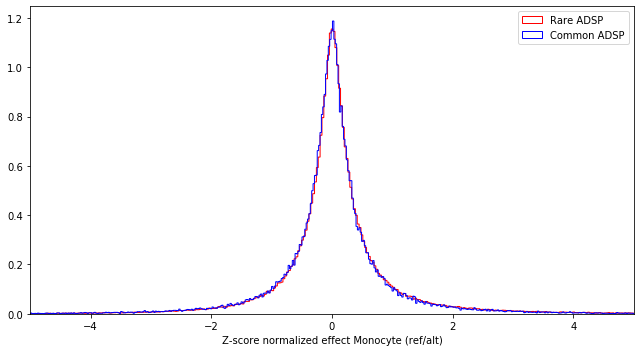

1.0841901237730271
0.0


In [21]:
plotRareAndCommonVariantScoreHistogramsAndConductFTest(nimh_rare_variant_info,
                                                       nimh_common_variant_info,
                                                       "Monocyte",
                                                       "NIMH")
plotRareAndCommonVariantScoreHistogramsAndConductFTest(adsp_rare_variant_info,
                                                       adsp_common_variant_info,
                                                       "Monocyte",
                                                       "ADSP")

In [27]:
nimh_common_variant_info = None
nimh_rare_variant_info = None
adsp_common_variant_info = None
adsp_rare_variant_info = None

In [ ]:
variant_info.columns

In [ ]:
variant_info.to_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/merged.SNVs.NIMH+ADSP_v2_bulk_models_scores.txt",
                   sep='\t',
                   na_rep="nan")

In [22]:
variant_info.sort_values(by="Monocyte_effect_score",
                        inplace=True)

In [23]:
variant_info.head()

CHROM        POS                  ID          rsid REF ALT  \
4866007       2   99337196   chr2:99337196:C:T  rs1008006300   C   T   
65265895      4    2962864    chr4:2962864:C:G  rs1256966147   C   G   
43164092      1  246932299  chr1:246932299:G:A   rs530473003   G   A   
16041073      6   27687697   chr6:27687697:A:C  rs1036852496   A   C   
97422271     17   75940938  chr17:75940938:G:A   rs543118951   G   A   

           AF.nimh  AN.nimh  AF.adsp_fams  AN.adsp_fams  ...  \
4866007   0.000677   2786.0           NaN           NaN  ...   
65265895       NaN      NaN           NaN           NaN  ...   
43164092       NaN      NaN      0.000209        1684.0  ...   
16041073  0.000678   2786.0           NaN           NaN  ...   
97422271       NaN      NaN           NaN           NaN  ...   

          Microglia_alt_score  Monocyte_effect_score  Monocyte_ref_score  \
4866007             17.226564              -6.366488            6.764430   
65265895            11.972163              -5.464151            5.246869   
43164092            16.513407              -5.351658            6.093563   
16041073            22.617779              -5.273288            5.475402   
97422271            11.172061              -5.248538            8.044534   

          Monocyte_alt_score  Neuron_effect_score  Neuron_ref_score  \
4866007            13.130918            -1.432092          8.083449   
65265895           10.711020                  NaN               NaN   
43164092           11.445221            -1.711742         11.626617   
16041073           10.748691            -1.775166          5.957900   
97422271           13.293072                  NaN               NaN   

          Neuron_alt_score  Microglia_effect_score_normed  \
4866007           9.515541                      -8.108226   
65265895               NaN                      -5.375896   
43164092         13.338360                      -6.570573   
16041073          7.733066                      -4.707497   
97422271               NaN                      -2.354949   

          Monocyte_effect_score_normed  Neuron_effect_score_normed  
4866007                     -17.446423                   -3.166033  
65265895                    -14.973703                         NaN  
43164092                    -14.665432                   -3.784277  
16041073                    -14.450670                   -3.924492  
97422271                    -14.382846                         NaN  

[5 rows x 24 columns]

In [24]:
snigdha_snp_list_unique_scores_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/common_variants/snigdha_snp_list_unique_haploreg_hg19_positions_1kb_and_500bp_sequences_microglia_monocyte_neuron_bulk_scores.txt"

In [25]:
snigdha_snp_list_unique_scores = pd.read_csv(snigdha_snp_list_unique_scores_file,
                                            sep='\t')

In [26]:
snigdha_snp_list_unique_scores_merged = snigdha_snp_list_unique_scores.merge(variant_info,
                                     how='inner',
                                     left_on="LD_RSID",
                                     right_on="rsid",
                                     suffixes=('_ad', '_tanzi')
                                    )

In [50]:
snigdha_snp_list_unique_scores_merged.loc[snigdha_snp_list_unique_scores_merged.Monocyte_effect_score.abs()>=2*np.std(variant_info.Monocyte_effect_score)][["LD_RSID","REF_ad","ALT_ad","REF_tanzi","ALT_tanzi","Microglia_effect_score","Monocyte_effect_score","Neuron_effect_score"]]

LD_RSID REF_ad ALT_ad REF_tanzi ALT_tanzi  Microglia_effect_score  \
167     rs636317      C      T         C         T                7.776990   
416    rs1010322      C      G         C         G                0.754094   
519    rs2526377      A      G         A         G                0.916309   
536   rs76726049      T      C         T         C                     NaN   
829    rs9270921      C      T         C         T                     NaN   
960    rs9271182      A      G         A         G                     NaN   
1104  rs28834970      T      C         T         C                     NaN   

      Monocyte_effect_score  Neuron_effect_score  
167                2.300268                  NaN  
416                1.288738                  NaN  
519                1.421061                  NaN  
536                0.850299                  NaN  
829                1.199634                  NaN  
960               -2.211533                  NaN  
1104              -1.287052                  NaN

In [51]:
snigdha_snp_list_unique_scores_merged.loc[snigdha_snp_list_unique_scores_merged.Microglia_effect_score.abs()>=2*np.std(variant_info.Microglia_effect_score)][["LD_RSID","REF_ad","ALT_ad","REF_tanzi","ALT_tanzi","Microglia_effect_score","Monocyte_effect_score","Neuron_effect_score"]]

LD_RSID REF_ad ALT_ad REF_tanzi ALT_tanzi  Microglia_effect_score  \
167   rs636317      C      T         C         T                7.776990   
584  rs6064392      G      T         G         T                2.860757   
947  rs9271162      G      T         G         T                1.611466   

     Monocyte_effect_score  Neuron_effect_score  
167               2.300268                  NaN  
584               0.555647                  NaN  
947               0.139354             -0.57666

In [52]:
snigdha_snp_list_unique_scores_merged.loc[snigdha_snp_list_unique_scores_merged.Neuron_effect_score.abs()>=2*np.std(variant_info.Neuron_effect_score)][["LD_RSID","REF_ad","ALT_ad","REF_tanzi","ALT_tanzi","Microglia_effect_score","Monocyte_effect_score","Neuron_effect_score"]]

LD_RSID REF_ad ALT_ad REF_tanzi ALT_tanzi  Microglia_effect_score  \
373  rs395601      G      C         G         C                0.206289   

     Monocyte_effect_score  Neuron_effect_score  
373               0.102526            -1.125029